##### Task 1.
Za višemodalne raspodele definisane u prethodnoj vežbi u zadatku 1) izvršiti estimaciju vrednosti
gustine raspodele verovatnoća na osnovu 100, 500, 1000, 5000 i 10000 uzoraka primenom metode
najbližih suseda. Za rastojanje koristiti Euklidsku metriku, a za broj najbližih suseda k = 20 . Zapreminu
računati kao dvostruko rastojanje. Dati uporedni prikaz originalnih raspodela i dobijenih estimacija.

a) jednodimenzionalna Gausova mešavina sa 2 moda određena sa:

 $μ_1$ = 0 ,  $σ_1^2$ = 0.2;
 
 $μ_2$ = 2.5 ,$σ_2^2$ = 0.2;
 
b) jednodimenzionalna Gausova mešavina sa 5 modova određena sa:

 $μ_1$ = -1 ,  $σ_1^2$ = 0.2;

 $μ_2$ = 2 ,  $σ_2^2$ = 0.4;

 $μ_3$ = 4 ,  $σ_3^2$ = 0.4;

 $μ_4$ = 5 ,  $σ_1^4$ = 0.1;

 $μ_5$ = 5 ,  $σ_5^2$ = 0.3;

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from IPython.display import Math

## Function drawSamples

In [2]:
def drawSamples(numSamples, distParams, weights):
    import numpy as np
    
    #Check to see if the distParams is in correct form (Matrix)
    if np.shape(distParams)[1] != 2:
        return -1
    
    #Shape of weights assigned to distribution parameters must be correct
    if len(weights) != np.shape(distParams)[0]:
        return -1
    
    ys = []
    
    for i in range(numSamples):
        #Choose a random number
        j = np.random.choice(len(weights), p = weights)
        #Choose the distribution corresponding to the weight
        mu,sigma = distParams[j]
        #Take one sample and append it to the list of samples
        sample = np.random.normal(loc = mu, scale = sigma, size = 1)
        ys.append(sample[0])
        
    return ys

## kNN Density Estimator

In [3]:
def kNNDensityEstimator(numSamples, distParams, weights, kNeighbors, plot = False):
    
    #Take samples from previously defined function
    samples = drawSamples(numSamples, distParams, weights)
    
    N = len(samples)
    samplesSorted = np.sort(samples)
    probs = []
    distances = []
    k = kNeighbors
    for i in range(N):
        #To save on computation time, J doesnt go trough all the samples, but k+1 to the left and k+1 to the right
        #That is the reason why we sorted the samples
        for j in range(max(0,i-k),min(N,i+k)):
            distances.append(np.linalg.norm(samplesSorted[i] - samplesSorted[j]))
            distancesSorted = np.sort(distances)
        #Volume as a double distance to the k-th closest of the given sample
        volume = 2*distancesSorted[k-1]
        distances = []
        pHat = kNeighbors/(volume*N)
        probs.append(pHat)
    
    if plot == True:
        
        plt.plot(np.sort(samples),probs, color = 'darkgreen')
        plt.show()
        
    return [np.sort(samples), probs]

## Function plotGaussiansMixture

In [4]:
def plotGaussiansMixture(distParams, weights, plot = False):
    from scipy import stats
    
    xs = np.linspace(-9,9,1000)
    ys = np.zeros(len(xs))
    for j in range(np.shape(distParams)[0]):
        ys += stats.norm.pdf(xs,loc = distParams[j][0],scale = distParams[j][1])* weights[j]
    
    if plot == True:
        plt.plot(xs,ys, color = 'purple')
        plt.show()
    
    return [xs,ys]

In [5]:
def plotPDFandEstimations(numSamples, kNeighbors, distParams, weights, figsize):
    
    xs1, ys1 = plotGaussiansMixture(distParams = distParams, weights= weights)
    xs2, ys2 = kNNDensityEstimator(numSamples, distParams, weights, kNeighbors, plot = False)
    
    plt.figure(figsize = figsize)
    plt.plot(xs2,ys2, color = 'r')
    plt.plot(xs1,ys1, color = 'b', linewidth = 3,alpha = 0.7)
    plt.xlim(min(xs2),max(xs2))

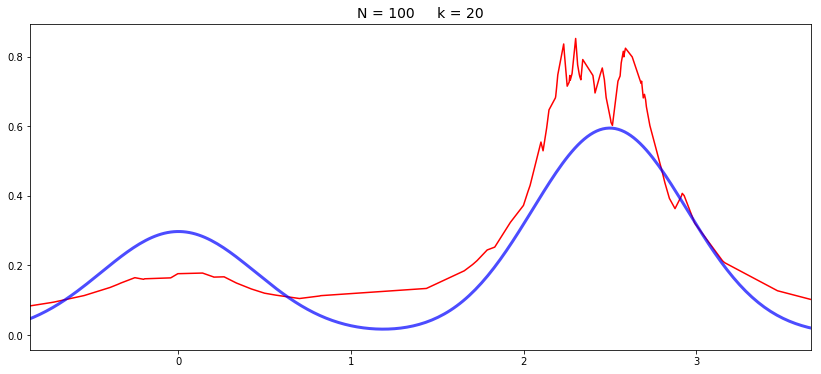

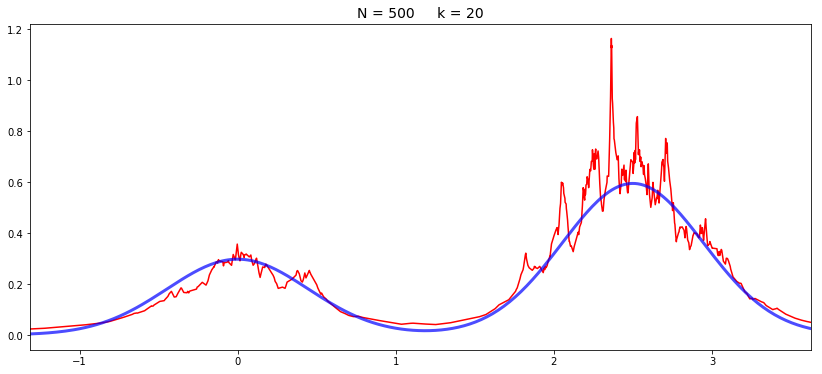

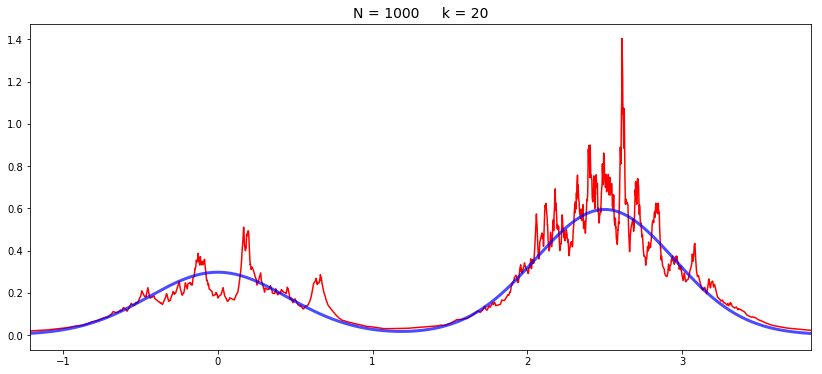

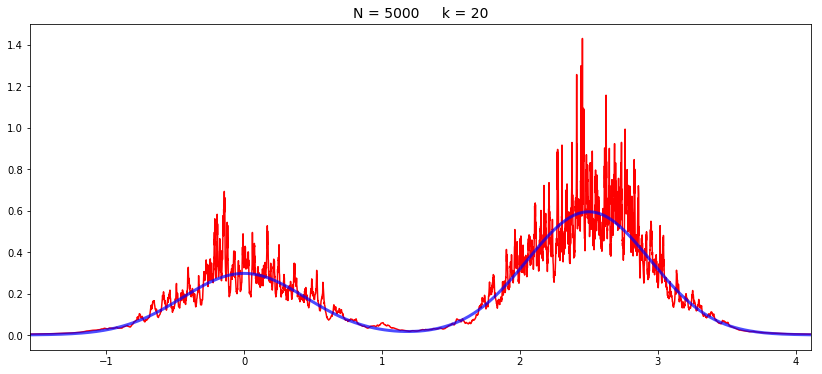

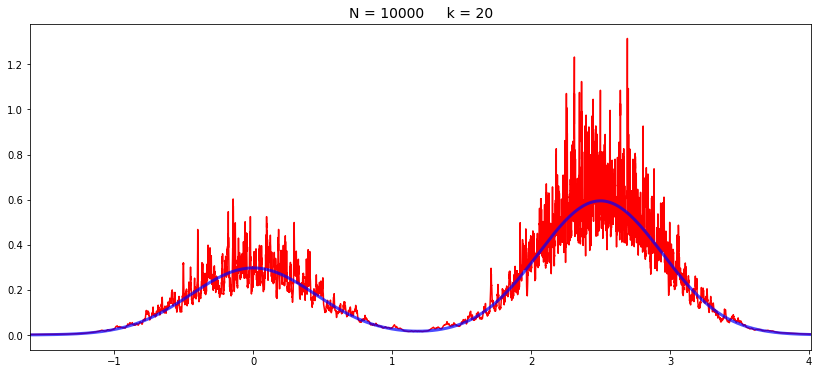

In [6]:
numOfSamples = [100,500,1000,5000,10000]

two_modes = [[0, np.sqrt(0.2)],
             [2.5, np.sqrt(0.2)]]
weights2 = [1/3, 2/3]

for x in numOfSamples:
    plotPDFandEstimations(numSamples = x, distParams = two_modes, weights = [1/3, 2/3],
                          kNeighbors = 20, figsize = (14,6))
    plt.title('N = ' + str(x) + '     k = 20', fontsize = 14)

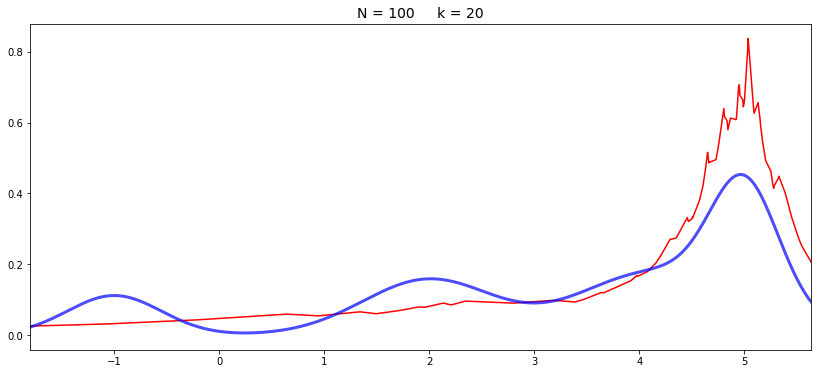

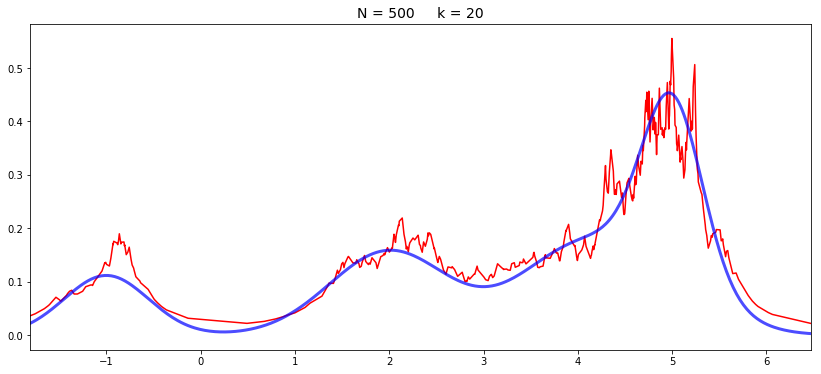

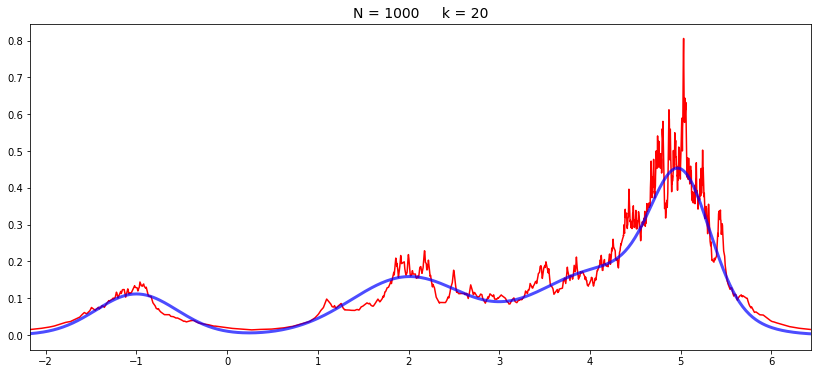

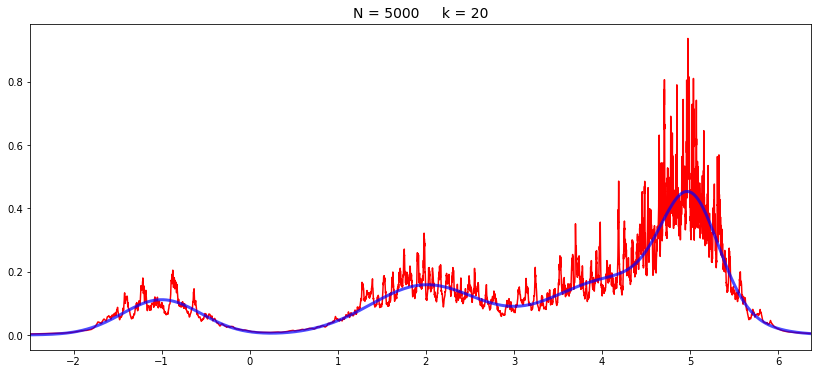

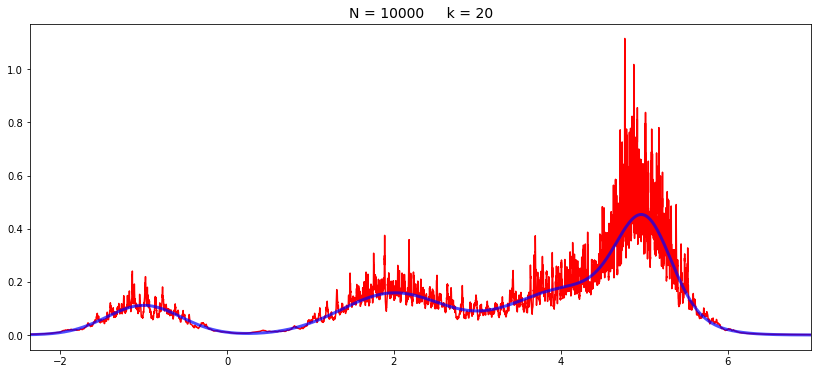

In [7]:
five_modes = [[-1, np.sqrt(0.2)],
              [2, np.sqrt(0.4)],
              [4, np.sqrt(0.4)],
              [5, np.sqrt(0.1)],
              [5, np.sqrt(0.3)]]
weights5 = [0.125, 0.25, 0.25, 0.25, 0.125]

for x in numOfSamples:
    plotPDFandEstimations(numSamples = x, distParams = five_modes, weights = weights5,
                          kNeighbors = 20, figsize = (14,6))
    plt.title('N = ' + str(x) + '     k = 20', fontsize = 14)

# Task 2. 
Ponoviti prethodni zadatak za različite vrednosti k i utvrditi na koji način zahtevani broj najbližih
suseda utiče na kvalitet estimacije.

In [8]:
def RMSE(samples, probs, distParams, weights):
    N = len(samples)
    
    sumOfSquaredErrors = 0
        
    for i in range(len(samples)):
        y = 0    
        for j in range(np.shape(distParams)[0]):
            y += stats.norm.pdf(samples[i],loc = distParams[j][0],scale = distParams[j][1])* weights[j]
        sumOfSquaredErrors += np.power(y - probs[i], 2)
        
    rmse = np.power(sumOfSquaredErrors/N, 1/2)
    return rmse

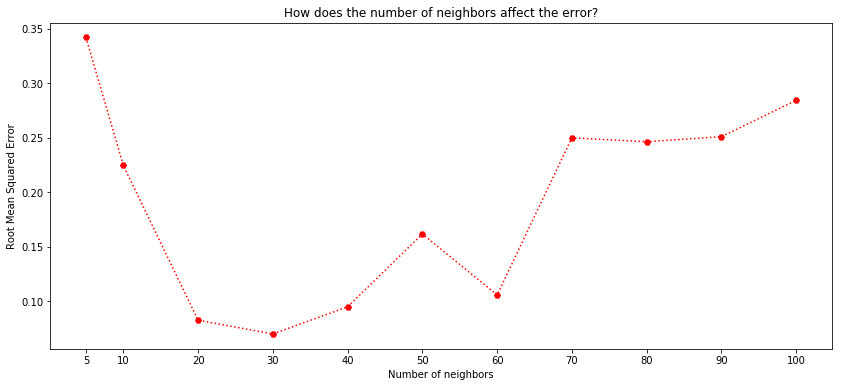

In [9]:
neighbors = [5,10,20,30,40,50,60,70,80,90,100]
errors = []

for k in neighbors:
    samples, probs = kNNDensityEstimator(100, distParams = two_modes, weights = [1/3, 2/3], kNeighbors = k)
    rmse = RMSE(samples = samples, probs = probs, distParams = two_modes, weights = [1/3,2/3])
    errors.append(rmse)

plt.figure(figsize = (14,6))
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Number of neighbors')
plt.title('How does the number of neighbors affect the error?')
plt.xticks(neighbors)
plt.plot(neighbors, errors,'rH:')
plt.show()

# Task 3.

Generisti po 1000 uzoraka klasa koje su definisane raspodelama datim u zadatku 1) b) u vežbi 1. Slično
kao pod 3) u vežbi 1 klasifikovati svaki od uzoraka korišćenjem ML kriterijuma, ali pretpostaviti da
raspodele verodostojnosti nisu poznate. Za estimaciju vrednosti raspodela na mestu svakog uzorka
koristiti kNN metod, a optimalne vrednosti k pokušati odrediti tako da broj pogrešno klasifikovanih
uzoraka klasa bude što manji. Za približno određivanje reda veličine k za svaku od posmatranih klasa
pri 1000 uzoraka može se koristiti zadatak 1).

$μ_1$ = −4 , $σ_1^2$ = 2

$μ_2$ = 3  , $σ_2^2$ =1.5

Klasifikacija koriscenjem ML kriterijuma:
- označiti svaki od uzoraka diskretnom labelom klase kojoj pripada (ispravnom labelom)
- definisati pravilo odlučivanja, tj. funkciju koja na osnovu poznatih parametara raspodele datih u 1) za
posmatrani uzorak/obeležje vraća najverovatniju vrednost klasne labele, koja u opštem slučaju ne
mora da se poklapa sa ispravnom labelom (slučaj pogrešne klasifikacije)
- pomoću formiranog pravila odlučivanja izvršiti klasifikaciju svih generisanih uzorka i odrediti
prosečan broj pogrešno klasifikovanih uzoraka svake klase

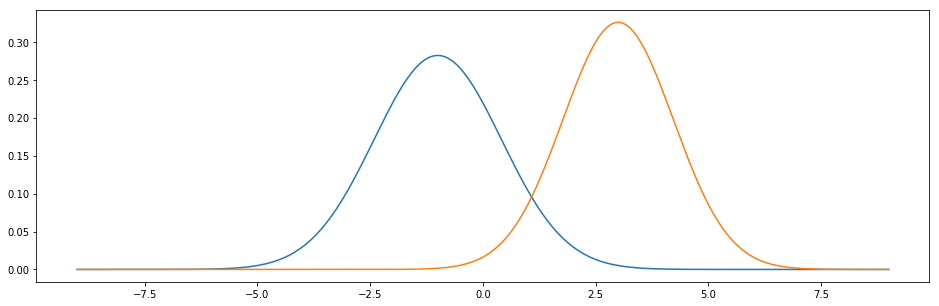

In [10]:
xs1, ys1 = plotGaussiansMixture(distParams = [[-1,np.sqrt(2)]], weights = [1])
xs2, ys2 = plotGaussiansMixture(distParams = [[3,np.sqrt(1.5)]], weights = [1])

plt.figure(figsize = (16,5))
plt.plot(xs1,ys1)
plt.plot(xs2,ys2)

In [11]:
samples1, probs1 = kNNDensityEstimator(500, distParams = [[-1,np.sqrt(2)]], weights = [1],kNeighbors = 21)
samples2, probs2 = kNNDensityEstimator(500, distParams = [[3,np.sqrt(1.5)]], weights = [1],kNeighbors = 21)

In [63]:
def kNN_ML(samples1,probs1,samples2,probs2,kNeighbors):
    
    #Initialize distances from samples1 and from samples2
    distances1 = []
    distances2 = []
    k = kNeighbors
    N = len(samples1)
    #Initialize final result as an empty list
    samplesClassified = []
    
    #Labeling the samples1,probs1 and samples2,probs2 as 3 element tuples
    samplesProbsLabeled1 = list( zip( samples1, probs1, np.ones(N, dtype = np.int8) ) )
    samplesProbsLabeled2 = list( zip( samples2, probs2, 2*np.ones(N, dtype = np.int8) ) )
    
    #Join them in one list and sort the list
    samplesProbsLabeled = samplesProbsLabeled1 + samplesProbsLabeled2
    samplesProbsLabeledSorted = sorted(samplesProbsLabeled, key = lambda x: x[0])

    for i in range(2*N):
        for j in range(500):
            if j == i:
                pass
            else:
                distances1.append((np.absolute(samplesProbsLabeledSorted[i][0] - samplesProbsLabeled1[j][0]),
                                  samplesProbsLabeled1[j][1]) )
                distances2.append((np.absolute(samplesProbsLabeledSorted[i][0] - samplesProbsLabeled2[j][0]),
                                  samplesProbsLabeled2[j][1]) )
                
                
        distancesSorted1 = sorted(distances1, key = lambda x: x[0])
        distancesSorted2 = sorted(distances2, key = lambda x: x[0])
                                
        prob1 = 0
        prob2 = 0
        
        for m in range(k):
                prob1 += distancesSorted1[m][1]
                prob2 += distancesSorted2[m][1]
                                 
        if prob1 > prob2:
            samplesClassified.append( (samplesProbsLabeledSorted[i][0], 1) )
            
        elif prob1 < prob2:
            samplesClassified.append( (samplesProbsLabeledSorted[i][0], 2) )
            
        else:
            samplesClassified.append( (samplesProbsLabeledSorted[i][0], np.random.choice([1,2])))
         
        distances1 = []
        distances2 = []
        
    return samplesClassified

In [64]:
def kNNAccuracy(samples1, samples2, samplesClassified, toPrint = False):
    
    samplesLabeled1 = [(x,1) for x in samples1]
    samplesLabeled2 = [(x,2) for x in samples2]
    
    samplesLabeled = samplesLabeled1 + samplesLabeled2
    samplesLabeledSorted = sorted(samplesLabeled, key = lambda x: x[0])
    
    N = len(samplesLabeled)
    numberOfMistakes = 0
    for i in range(N):
        if samplesLabeledSorted[i][1] != samplesClassified[i][1]:
            numberOfMistakes += 1
    
    percentage = 1 - numberOfMistakes / N
    
    if toPrint == True:
        print('Number of missclassified samples is ' + str(numberOfMistakes) + ' out of ' + str(N))
        print('Percentage of correctly classified samples is: ' + str(round(percentage*100, 3)) + '%')

    return numberOfMistakes, percentage

In [65]:
samplesClassified = kNN_ML(samples1, probs1, samples2, probs2,kNeighbors = 5)

In [66]:
numberOfMistakes, percentage = kNNAccuracy(samples1 = samples1, samples2 = samples2,
                                           samplesClassified = samplesClassified, toPrint = True)

Number of missclassified samples is 84 out of 1000
Percentage of correctly classified samples is: 91.6%


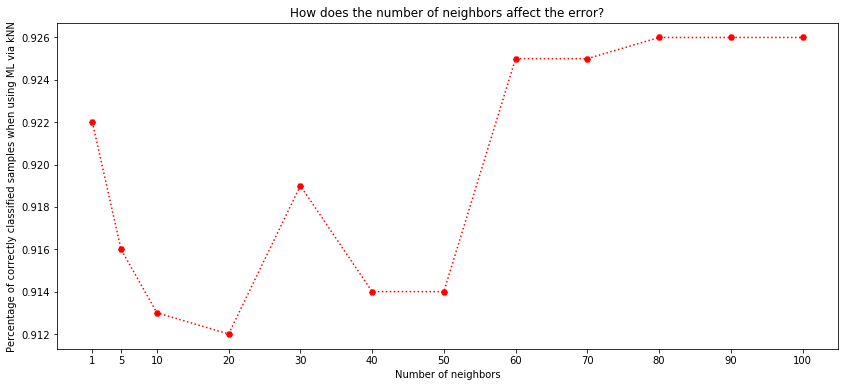

In [58]:
neighbors = [1,5,10,20,30,40,50,60,70,80,90,100]
errors = []

for k in neighbors:
    samplesClassfied = kNN_ML(samples1 = samples1, samples2 = samples2, 
                              probs1 = probs1, probs2 = probs2,kNeighbors = k)
    numberOfMistakes, percentage = kNNAccuracy(samples1 = samples1, samples2 = samples2, 
                                               samplesClassified = samplesClassfied)
    errors.append(percentage)

plt.figure(figsize = (14,6))
plt.ylabel('Percentage of correctly classified samples when using ML via kNN')
plt.xlabel('Number of neighbors')
plt.title('How does the number of neighbors affect the error?')
plt.xticks(neighbors)
plt.plot(neighbors, errors,'rH:')
plt.show()

# Task 3.1
kNN klasifikator za nove uzorke na osnovu Maximum Likelihood kriterijuma

In [67]:
def kNNMaximumLikelihood(x, samples1, probs1, samples2, probs2, kNeighbors, toPrint = False):
    
    N = len(samples1)
    k = kNeighbors
    
    samplesProbsLabeled1 = list( zip( samples1, probs1 ) )
    samplesProbsLabeled2 = list( zip( samples2, probs2 ) )
    
    distances1 = []
    sumOfClosestProbs1 = 0
    
    distances2 = []
    sumOfClosestProbs2 = 0
    
    for i in range(N):
        distances1.append( ( np.absolute(x - samplesProbsLabeled1[i][0]),samplesProbsLabeled1[i][1]) )
        distances2.append( ( np.absolute(x - samplesProbsLabeled2[i][0]),samplesProbsLabeled2[i][1]) )
        
    distancesSorted1 = sorted(distances1, key = lambda x: x[0])
    distancesSorted2 = sorted(distances2, key = lambda x: x[0])
    
    for i in range(k):
        sumOfClosestProbs1 += distancesSorted1[i][1]
        sumOfClosestProbs2 += distancesSorted2[i][1]
        
    prob1 = sumOfClosestProbs1
    prob1 = prob1/k
    
    prob2 = sumOfClosestProbs2
    prob2 = prob2/k
    
    if toPrint == True:
        print('P(' + str(x) + '|ClassOne) = ' + str( round(prob1, 3)))
        print('P(' + str(x) + '|ClassTwo) = ' + str( round(prob2, 3)))

    plt.figure(figsize = (16,5))
    plt.plot(samples1, probs1, 'red')
    plt.plot(samples2, probs2, 'blue')
    
    if prob1 > prob2:
        plt.plot([x], [0], color = 'k', marker='x', markersize=7)
        plt.plot([x], [prob1], color = 'k', marker='x', markersize=7)
        plt.plot([x,x],[0,prob1], color = 'red',alpha = 0.7, linewidth = 1,linestyle='--')
        
    if prob1 < prob2:
        plt.plot([x], [0], color = 'k', marker='x', markersize=7)
        plt.plot([x], [prob2], color = 'k', marker='x', markersize=7)
        plt.plot([x,x],[0,prob2], color = 'blue', alpha = 0.7, linewidth = 1,linestyle='--')

P(1|ClassOne) = 0.12
P(1|ClassTwo) = 0.123


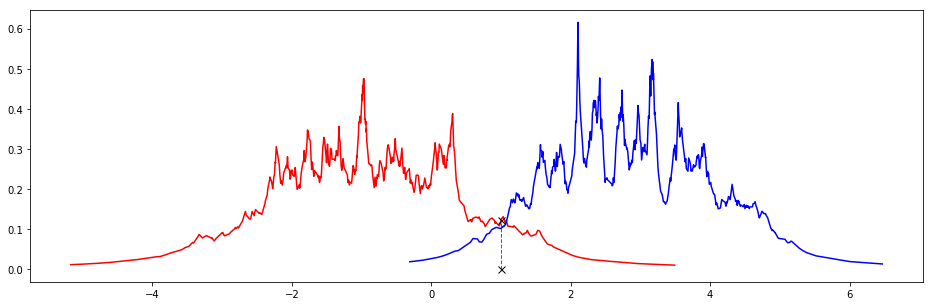

In [69]:
kNNMaximumLikelihood(x = 1, samples1 = samples1, probs1 = probs1,
                     samples2 = samples2 , probs2 = probs2, kNeighbors = 11, toPrint = True)

# Task 4.1

Za svaki od labeliranih uzoraka iz 3) odrediti k najbližih suseda i na osnovu labela preovlađujućeg broja
najbližih uzoraka izvršiti klasifikaciju.

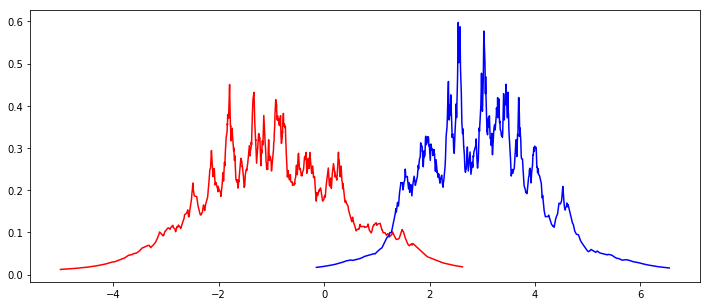

In [14]:
xs1,ys1 =kNNDensityEstimator(500, distParams = [[-1,np.sqrt(2)]], weights = [1], kNeighbors = 21)
xs2,ys2 =kNNDensityEstimator(500, distParams = [[3,np.sqrt(1.5)]], weights = [1], kNeighbors = 21)

plt.figure(figsize = (12,5))
plt.plot(xs1,ys1, 'red')
plt.plot(xs2,ys2, 'blue')

In [38]:
def kNNClassifier(samples1, samples2, kNeighbors):
    
    samplesLabeled1 = [(x,1) for x in samples1]
    samplesLabeled2 = [(x,2) for x in samples2]
    
    samplesLabeled = samplesLabeled1 + samplesLabeled2
    samplesLabeledSorted = sorted(samplesLabeled, key = lambda x: x[0])

    distances = []
    k = kNeighbors
    N = len(samplesLabeledSorted)
    
    samplesClassified = []
    
    for i in range(N):
        for j in range(max(0,i-k-1),min(N,i+k+1)):
            if j == i:
                pass
            else:
                distances.append( (np.absolute(samplesLabeledSorted[i][0] - samplesLabeledSorted[j][0]),
                                   samplesLabeledSorted[j][1]) )
                
                
        distancesSorted = sorted(distances, key = lambda x: x[0])
                                         
        class1 = 0
        class2 = 0
        
        for m in range(k):
            if distancesSorted[m][1] == 1:
                class1 += 1
            else:
                class2 += 1
                                 
        if class1>class2:
            samplesClassified.append( (samplesLabeledSorted[i][0], 1) )
            
        elif class1<class2:
            samplesClassified.append( (samplesLabeledSorted[i][0], 2) )
            
        else:
            samplesClassified.append( (samplesLabeledSorted[i][0], np.random.choice([1,2])))
        
        distances = []
            
    return samplesClassified

In [40]:
samples1 = drawSamples(1000, distParams = [[-1,np.sqrt(2)]], weights = [1])
samples2 = drawSamples(1000, distParams = [[3,np.sqrt(1.5)]], weights = [1])

In [41]:
samplesClassfied = kNNClassifier(samples1 = samples1, samples2 =  samples2, kNeighbors = 7)

In [42]:
numberOfMistakes, percentage = kNNAccuracy(samples1 = samples1, samples2 = samples2, 
                                          samplesClassified = samplesClassfied, toPrint = True)

Number of missclassified samples is 122 out of 2000
Percentage of correctly classified samples is: 93.9%


# Task 4.2

Utvrditi kako izbor k utiče na prosečan broj pogrešnoklasifikovanih uzoraka i uporediti rezultat sa klasifikacijom u vežbi 1.

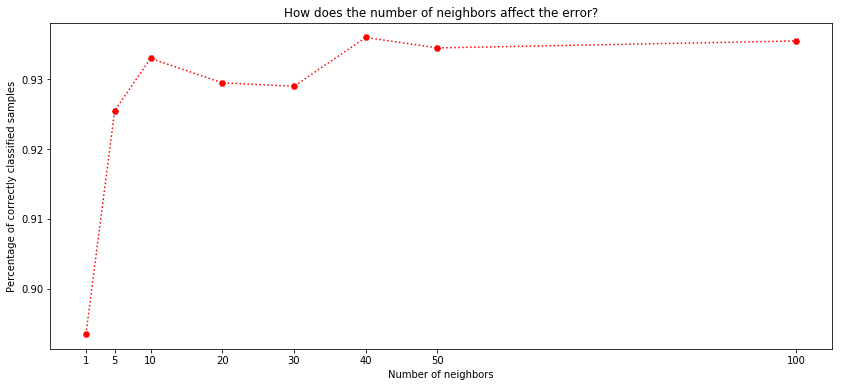

Wall time: 0 ns


In [25]:
neighbors = [1,5,10,20,30,40,50,100]
errors = []

for k in neighbors:
    samplesClassfied = kNNClassifier(samples1 = samples1, samples2 = samples2, kNeighbors = k)
    numberOfMistakes, percentage = kNNAccuracy(samples1 = samples1, samples2 = samples2, 
                                               samplesClassified = samplesClassfied)
    errors.append(percentage)

plt.figure(figsize = (14,6))
plt.ylabel('Percentage of correctly classified samples')
plt.xlabel('Number of neighbors')
plt.title('How does the number of neighbors affect the error?')
plt.xticks(neighbors)
plt.plot(neighbors, errors,'rH:')
plt.show()